# Netflix Dataset

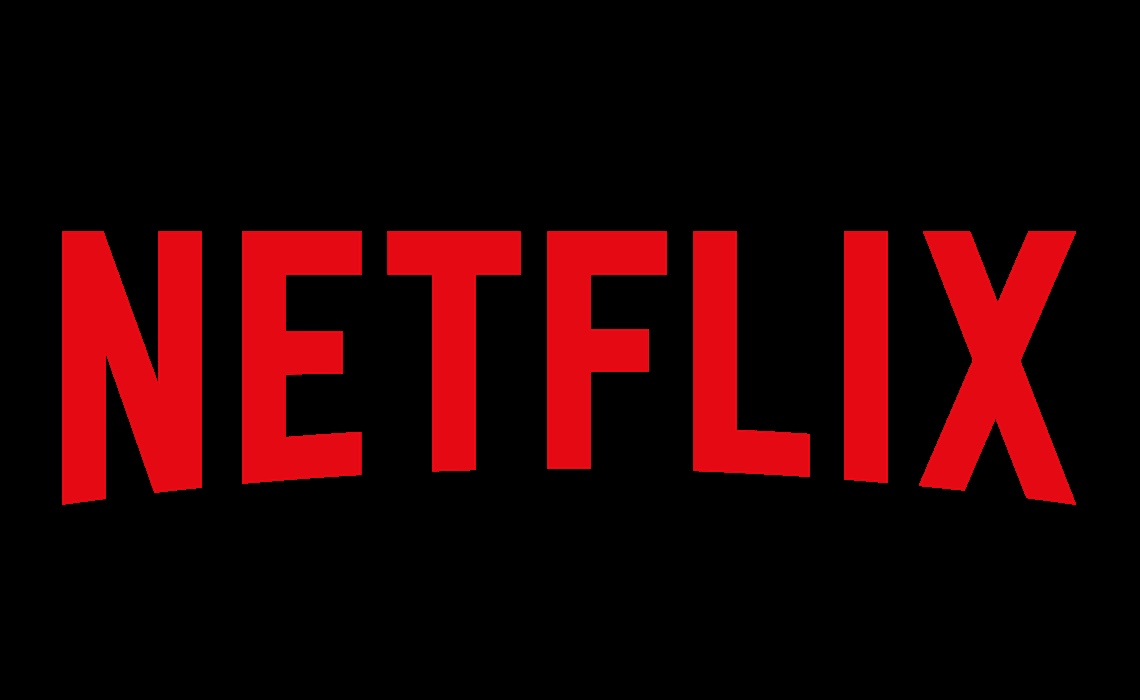

# IMPORTING REQUIRED LIBRARIES & DATA:

In [1]:
import pandas as pd

# IMPORTING DATA FROM CSV FILE:

In [2]:
netflix = pd.read_csv("C:\\Users\\harsh\\OneDrive\\Desktop\\CSV\\netflix_titles.csv")

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Removing Duplicate Values

In [4]:
netflix.drop_duplicates(inplace=True)

In [5]:
netflix.shape

(8807, 12)

In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.5+ KB


I removed all duplicate rows to ensure there were no repeated records in the dataset.

# Handling the missing or null values 

In [7]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

 As per obversation there 2634 directors,825 cast, 831 country, 10 date_added, 4 rating and 3 duration are missing or null in our data.

In [8]:
netflix['director'].fillna('Not Specified', inplace=True)
netflix['cast'].fillna('Not Specified', inplace=True)
netflix['country'].fillna('Not Specified', inplace=True)
netflix['date_added'].fillna(method='ffill', inplace=True)
netflix['rating'].fillna(netflix['rating'].mode()[0], inplace=True)
netflix['duration'].fillna('Unknown', inplace=True)

In [9]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

As per observation the missing and null vales are handled 

# Standardizing the text values

In [10]:
netflix['type'] = netflix['type'].str.strip().str.title()
netflix['country'] = netflix['country'].str.strip().str.title()
netflix['rating'] = netflix['rating'].str.strip().str.upper()

In [11]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,Tv Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,Tv Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,Tv Show,Jailbirds New Orleans,Not Specified,Not Specified,Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,Tv Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


I standardized text formatting by removing leading/trailing spaces and converting by:

The type column to Title Case (e.g., "movie" → "Movie"),The country column to Title Case (e.g., "united states" → "United States"),and the rating column to Uppercase (e.g., "pg" → "PG").

# Converting the Dtype of the columns

In [12]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
netflix['release_year'] = netflix['release_year'].astype('int')

In [13]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int32         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(10)
memory usage: 860.1+ KB


I ensured all data types were correct, like setting release_year as an integer and date_added as a datetime object.

# Renaming columns

In [14]:
netflix.columns = netflix.columns.str.strip().str.lower().str.replace(' ', '_')

In [15]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

I renamed all column headers to lowercase and replaced spaces with underscores to improve readability and code usability.

# Exporting the cleaned dataset

In [16]:
netflix.to_csv("C:\\Users\\harsh\\OneDrive\\Desktop\\CSV\\netflix_titles_cleaned.csv", index=False)

Finally, I exported the cleaned dataset to a new CSV file named netflix_titles_cleaned.csv